In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

In [2]:
dt = 1e-5
dx = 5e-3
s = dt / dx**2
x_min = -1
x_max = 2
x = np.arange(x_min, x_max, dx)
print("s=",s)

def norm(f):
    return np.sum(f*f.conjugate()).real*dx

def norm_sep(fre, fim):
    return np.sum(fre*fre+fim*fim).real*dx

def initial_psi(x):
    A = 1
    x0 = 0.2
    w = 0.1
    k0 = 80
    temp = np.exp(-(x-x0)**2/w**2)*np.exp(1j*k0*x)
    return np.exp(-(x-x0)**2/w**2)*np.exp(1j*k0*x) / np.sqrt(norm(temp))

def potential(x):
    V_temp = np.zeros_like(x)
    mask = (x > (x_max+x_min)/2) & (x < (x_max+x_min)/2+0.1)
    #mask = (x > (x_max+x_min)/2) 
    V0 = 5000
    V_temp[mask] = V0
    return V_temp

def Hamiltonian(dx, V):
    size = V.shape[0]
    print(size)
    H = np.zeros((size,size))
    H[0,0] = 1/dx**2+V[0]
    H[0,1] = -0.5/dx**2
    H[-1,-1] = 1/dx**2+V[-1]
    H[-1,-2] = -0.5/dx**2
    
    for i in range(1,size-1):
        H[i,i-1] = -0.5/dx**2
        H[i,i+1] = -0.5/dx**2
        H[i,i] = 1/dx**2+V[i]
    return H

def compute_energy(psi,V,dx):
    H = Hamiltonian(dx, V)
    Energy = np.dot(psi.conjugate().T, np.dot(H, psi)).real*dx
    return Energy

V = potential(x)
H = Hamiltonian(dx, V)

psi0 = initial_psi(x)
Energy = compute_energy(psi0,V,dx)
print(compute_energy(psi0,V,dx))
print(norm(psi0))    

s= 0.4
600
600
600
3203.58452502
1.0


<IPython.core.display.Javascript object>


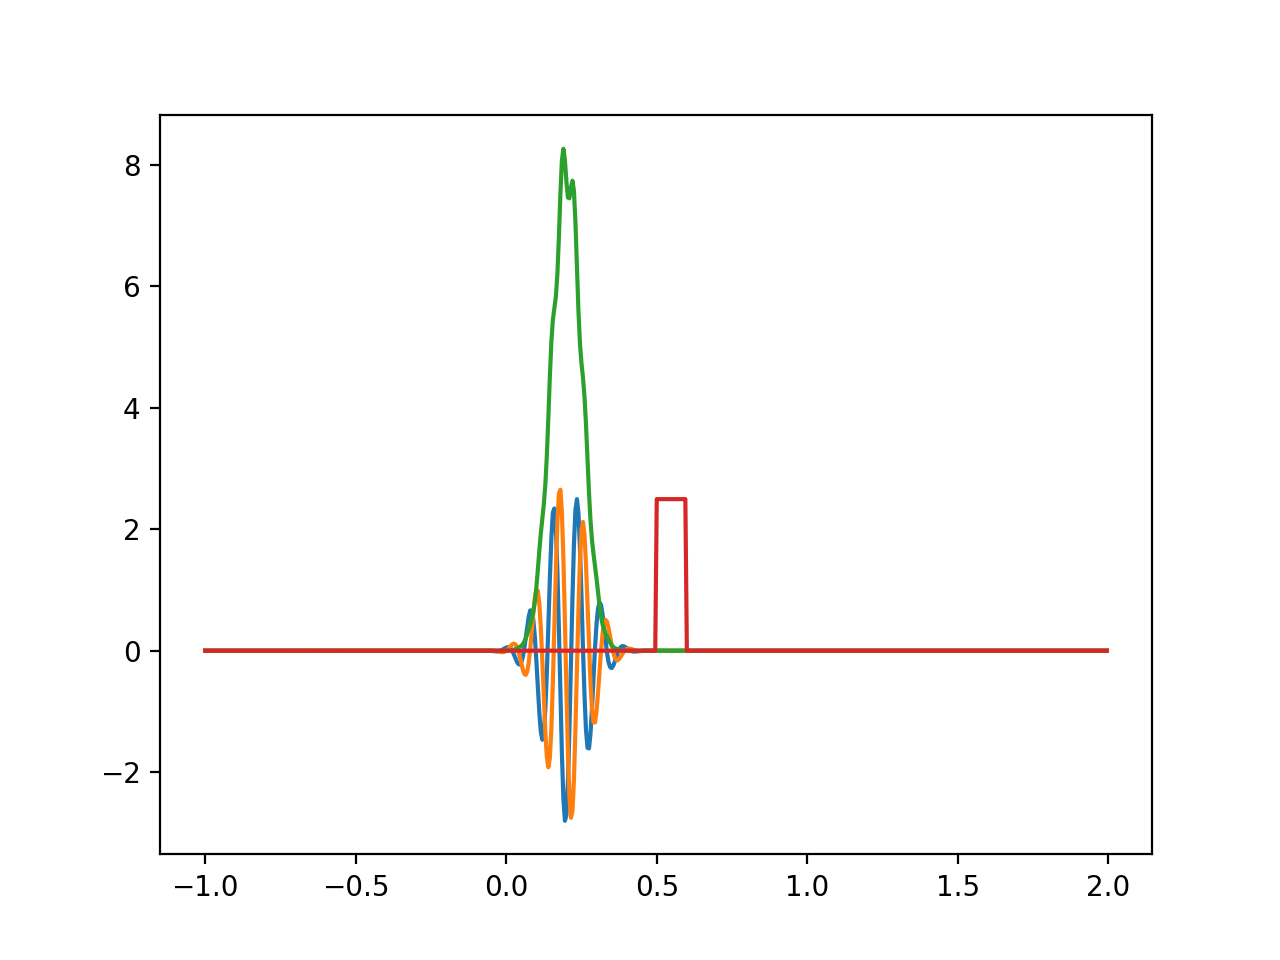

In [3]:
psi_re_old = np.zeros_like(x)
psi_re_new = np.zeros_like(x)
psi_im_old = np.zeros_like(x)
psi_im_new = np.zeros_like(x)

def density(m, psi_re_old_, psi_re_new_, psi_im_old_, psi_im_new_):
    if(m%2 == 0):
        density = psi_re_new_*psi_re_new_+psi_im_old_*psi_im_new_
    else:
        density = psi_re_new_*psi_re_old_+psi_im_new_*psi_im_new_
    return density

m=0
psi_re_old = psi0.real.copy()
psi_re_new = psi0.real.copy()
psi_im_old = psi0.imag.copy()
psi_im_new = psi0.imag.copy()

m=1
psi_im_new[1:-1] = psi_im_old[1:-1] + s*psi_re_new[0:-2] + s*psi_re_new[2:] - 2*(s+V[1:-1]*dt)*psi_re_new[1:-1]

def increment_step(m, psi_re_old, psi_re_new, psi_im_old, psi_im_new):
    m = m+1    
    if(m%2 == 0):
        psi_re_old = psi_re_new.copy()
        psi_re_new[1:-1] = psi_re_old[1:-1] - s*psi_im_new[0:-2] - s*psi_im_new[2:] + 2*(s+V[1:-1]*dt)*psi_im_new[1:-1]
    
    else:
        psi_im_old = psi_im_new.copy()
        psi_im_new[1:-1] = psi_im_old[1:-1] + s*psi_re_new[0:-2] + s*psi_re_new[2:] - 2*(s+V[1:-1]*dt)*psi_re_new[1:-1]
    return (m, psi_re_old, psi_re_new, psi_im_old, psi_im_new)

#steps = 100000
#for i in range(0, steps):
#    (m, psi_re_old, psi_re_new, psi_im_old, psi_im_new) = increment_step(m, psi_re_old, psi_re_new, psi_im_old, psi_im_new)

plt.figure()
plt.plot(x, psi_re_new)
plt.plot(x, psi_im_new)
plt.plot(x, density(m, psi_re_old, psi_re_new, psi_im_old, psi_im_new))
max_val_wf = np.max(psi_re_new)
max_val_V = np.max(V)
plt.plot(x, V*max_val_wf/max_val_V)
plt.show()

<IPython.core.display.Javascript object>


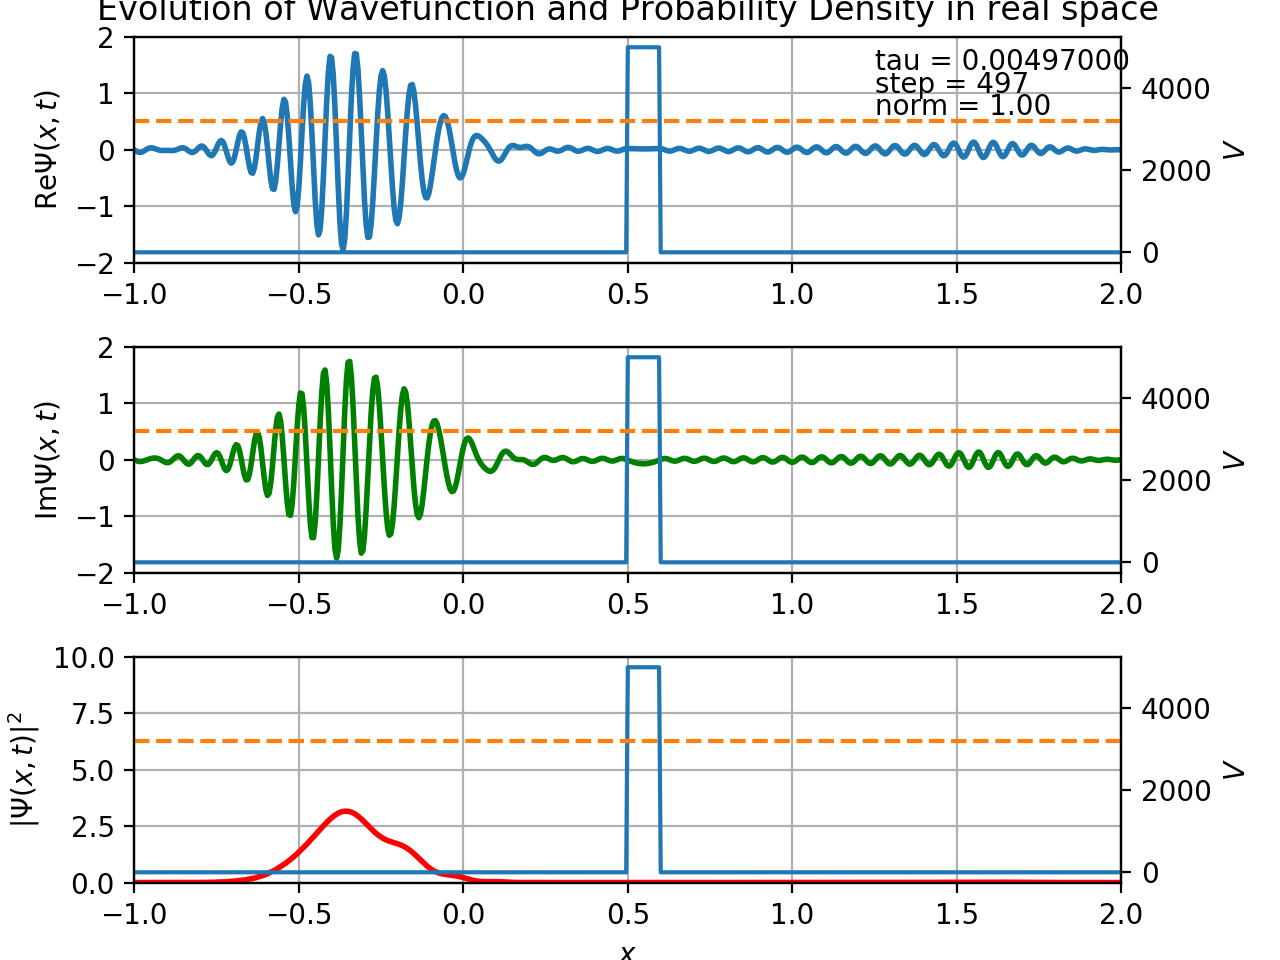

In [4]:
# create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='g')
line3, = ax3.plot([], [], lw=2, color='r')
ax1_twin = ax1.twinx()
ax2_twin = ax2.twinx()
ax3_twin = ax3.twinx()
ax1_twin.plot(x, V)
ax1_twin.plot([x[0],x[-1]], [Energy, Energy], '--')
ax2_twin.plot(x, V)
ax2_twin.plot([x[0],x[-1]], [Energy, Energy], '--')
ax3_twin.plot(x, V)
ax3_twin.plot([x[0],x[-1]], [Energy, Energy], '--')
ax1_twin.set_ylabel(r'$V$')
ax2_twin.set_ylabel(r'$V$')
ax3_twin.set_ylabel(r'$V$')
plt.tight_layout()
line = [line1, line2, line3]

# the same axes initalizations as before (just now we do it for both of them)
ax1.set_ylim(-2,2)
ax1.set_xlim(x_min, x_max)
ax1.grid()
ax1.set_ylabel(r'Re$\Psi(x,t)$')
ax1.set_title("Evolution of Wavefunction and Probability Density in real space")

ax2.set_ylim(-2, 2)
ax2.set_xlim(x_min, x_max)
ax2.grid()
ax2.set_ylabel(r'Im$\Psi(x,t)$')

ax3.set_ylim(0, 10)
ax3.set_xlim(x_min, x_max)
ax3.grid()
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$|\Psi(x,t)|^2$')

time_text = ax1.text(0.75, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
step_text = ax1.text(0.75, 0.85,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
norm_text = ax1.text(0.75, 0.75,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
time_per_frame = dt     # You could change this to make the animation faster or slower

def run_init():
    line[0].set_data([], [])
    line[1].set_data([], [])
    line[2].set_data([], [])
    return line,
    
def run(i, psi_re_old, psi_re_new, psi_im_old, psi_im_new):
    m = i+1
    (m, psi_re_old, psi_re_new, psi_im_old, psi_im_new) = increment_step(m, psi_re_old, psi_re_new, psi_im_old, psi_im_new)
    y1data = psi_re_new
    y2data = psi_im_new
    y3data = density(m-1, psi_re_old, psi_re_new, psi_im_old, psi_im_new)

    # update the data of the three line objects
    line[0].set_data(x, y1data)
    line[1].set_data(x, y2data)
    line[2].set_data(x, y3data)
    #Display the current animation time
    time_text.set_text('tau = %.8f' % (i*time_per_frame))
    step_text.set_text('step = ' + str(i))
    norm_text.set_text('norm = %.2f' % (np.sum(y3data)*dx))
    print(dt)
    return line, time_text, step_text, norm_text

ani = animation.FuncAnimation(fig, run, fargs = (psi_re_old, psi_re_new, psi_im_old, psi_im_new), init_func=run_init,
                               frames=1000, interval=1, blit=True)
    
plt.show()

<IPython.core.display.Javascript object>


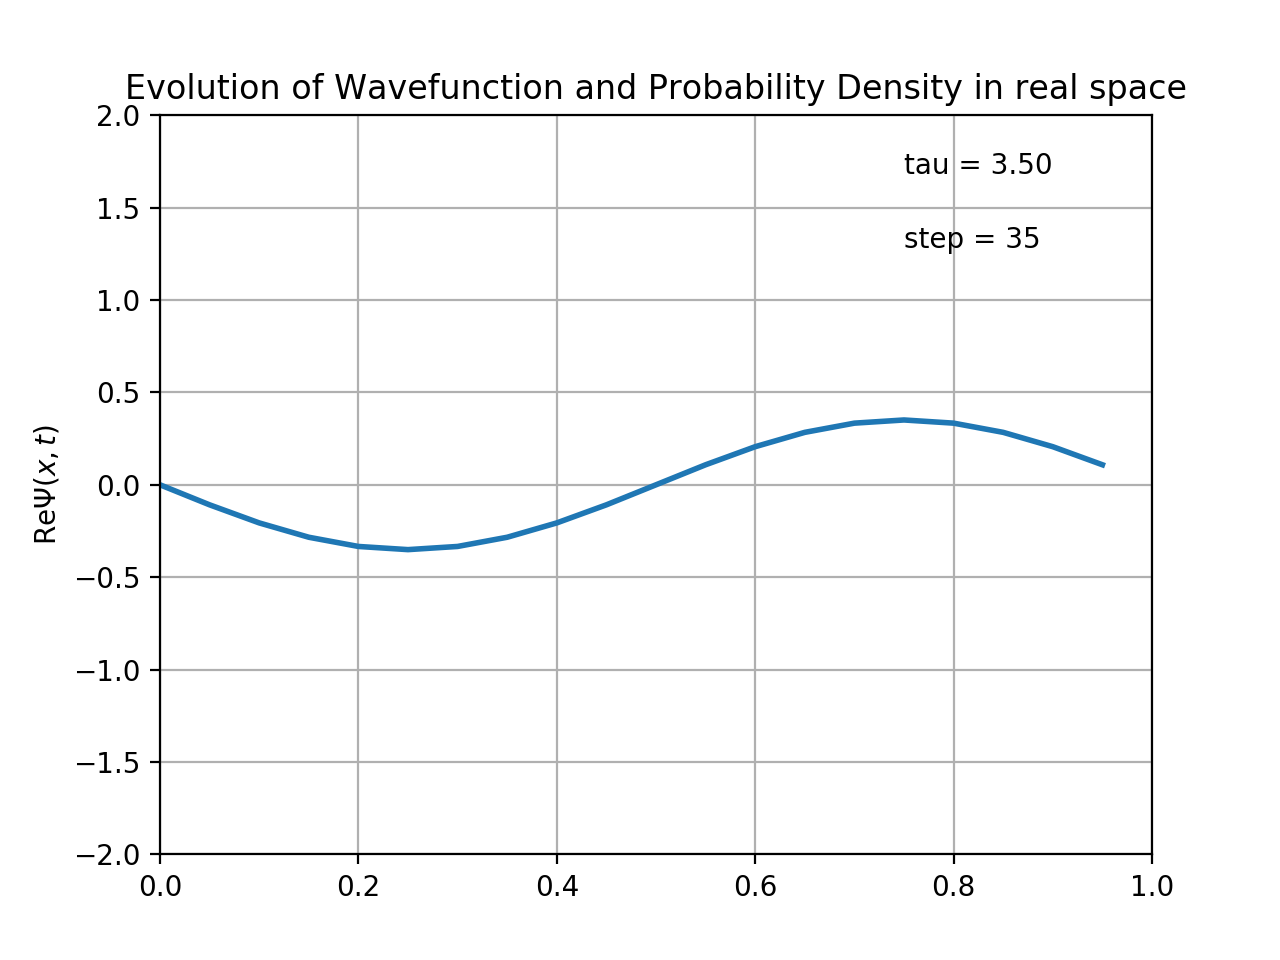

[  0.00000000e+00   2.60028835e-01   4.94604235e-01   6.80764327e-01
   8.00286463e-01   8.41470985e-01   8.00286463e-01   6.80764327e-01
   4.94604235e-01   2.60028835e-01   1.03050475e-16  -2.60028835e-01
  -4.94604235e-01  -6.80764327e-01  -8.00286463e-01  -8.41470985e-01
  -8.00286463e-01  -6.80764327e-01  -4.94604235e-01  -2.60028835e-01]


In [5]:
def fnc(x, omega, t):
    return np.sin(2*np.pi*x)*np.sin(omega*t)

fig, ax1 = plt.subplots(1,1)

# intialize two line objects (one in each axes)
omega = 1
x=np.arange(0,1,0.05)
print(fnc(x, omega, 1))
line1, = ax1.plot([], [], lw=2)
#ax1.plot(x, fnc(x, omega, 1))
line = [line1]

# the same axes initalizations as before (just now we do it for both of them)
ax1.set_ylim(-2,2)
ax1.set_xlim(0,1)
ax1.grid()
ax1.set_ylabel(r'Re$\Psi(x,t)$')
ax1.set_title("Evolution of Wavefunction and Probability Density in real space")

time_text = ax1.text(0.75, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
step_text = ax1.text(0.75, 0.85,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
norm_text = ax1.text(0.75, 0.75,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)


def run_init_fnc():
    line[0].set_data([], [])
    return line,
    
def run_fnc(i, omega):
    
    dt = 0.1
    time = i*dt
    data = fnc(x, omega, time)

    # update the data of the three line objects
    line[0].set_data(x, data)
    
    #Display the current animation time
    time_text.set_text('tau = %.2f' % (time))
    step_text.set_text('step = ' + str(i))
    
    return line, time_text, step_text


ani = animation.FuncAnimation(fig, run_fnc, fargs = (omega,), init_func=run_init_fnc, frames=1000, interval=10, blit=True)
    
plt.show()

In [8]:
def potential_wall(x):
    V_temp = np.zeros_like(x)
    mask = (x > (x_max+x_min)/2) & (x < (x_max+x_min)/2+0.1)
    #mask = (x > (x_max+x_min)/2) 
    V0 = 4000
    V_temp[mask] = V0
    return V_temp

def initial_gaussian_psi(x):
    A = 1
    x0 = 0.2
    w = 0.1
    k0 = 80
    temp = np.exp(-(x-x0)**2/w**2)*np.exp(1j*k0*x)
    return np.exp(-(x-x0)**2/w**2)*np.exp(1j*k0*x) / np.sqrt(norm(temp))

class leapfrog:
    def __init__(self, dt, dx, x_min, x_max, pot_fnc, psi0_fnc):
        self.x = np.arange(x_min, x_max, dx)
        self.dx = dx
        self.dt = dt
        self.s = dt / dx**2
        self.V = pot_fnc(x)
        self.psi0 = psi0_fnc(x)
        
        self.psi_re_old = np.zeros_like(self.x)
        self.psi_re_new = np.zeros_like(self.x)
        self.psi_im_old = np.zeros_like(self.x)
        self.psi_im_new = np.zeros_like(self.x)
        
        # take the first two steps, m=0 and m=1
        self.psi_re_old = self.psi0.real.copy()
        self.psi_re_new = self.psi0.real.copy()
        self.psi_im_old = self.psi0.imag.copy()
        self.psi_im_new = self.psi0.imag.copy()
        self.psi_im_new[1:-1] = self.psi_im_old[1:-1] + self.s*self.psi_re_new[0:-2] + self.s*self.psi_re_new[2:] - 2*(self.s+self.V[1:-1]*self.dt)*self.psi_re_new[1:-1]

        self.m = 0
        self.time = 0
        
    def reset(self):
        self.psi_re_old = self.psi0.real.copy()
        self.psi_re_new = self.psi0.real.copy()
        self.psi_im_old = self.psi0.imag.copy()
        self.psi_im_new = self.psi0.imag.copy()
        self.psi_im_new[1:-1] = self.psi_im_old[1:-1] + self.s*self.psi_re_new[0:-2] + self.s*self.psi_re_new[2:] - 2*(self.s+self.V[1:-1]*self.dt)*self.psi_re_new[1:-1]

        self.m = 0
        self.time = 0
        
        
    def step(self):
        self.m += 1
        self.time += self.dt
        
        if(self.m%2 == 0):
            self.psi_re_old = self.psi_re_new.copy()
            self.psi_re_new[1:-1] = self.psi_re_old[1:-1] - self.s*self.psi_im_new[0:-2] - self.s*self.psi_im_new[2:] + 2*(self.s+self.V[1:-1]*self.dt)*self.psi_im_new[1:-1]

        else:
            self.psi_im_old = self.psi_im_new.copy()
            self.psi_im_new[1:-1] = self.psi_im_old[1:-1] + self.s*self.psi_re_new[0:-2] + self.s*self.psi_re_new[2:] - 2*(self.s+self.V[1:-1]*self.dt)*self.psi_re_new[1:-1]
        return
   
    def density(self):
        if((self.m-1)%2 == 0):
            density = self.psi_re_new*self.psi_re_new+self.psi_im_old*self.psi_im_new
        else:
            density = self.psi_re_new*self.psi_re_old+self.psi_im_new*self.psi_im_new
        norm = np.sum(density)*self.dx
        return (density, norm)
    
    def Hamiltonian(self):
        size = self.V.shape[0]
        H = np.zeros((size,size))
        H[0,0] = 1/self.dx**2+self.V[0]
        H[0,1] = -0.5/self.dx**2
        H[-1,-1] = 1/self.dx**2+self.V[-1]
        H[-1,-2] = -0.5/self.dx**2

        for i in range(1,size-1):
            H[i,i-1] = -0.5/self.dx**2
            H[i,i+1] = -0.5/self.dx**2
            H[i,i] = 1/self.dx**2+self.V[i]
        return H
    
    def energy(self):
        H = self.Hamiltonian()
        psi = np.zeros_like(self.V, dtype=complex)
        psi = self.psi_re_new + 1j* self.psi_im_new
        Energy = np.dot(psi.conjugate().T, np.dot(H, psi)).real*dx
        return Energy.real
        
        
dt = 1e-5
dx = 5e-3
x_min = -1
x_max = 2
worker = leapfrog(dt, dx, x_min, x_max, potential_wall, initial_gaussian_psi)


<IPython.core.display.Javascript object>


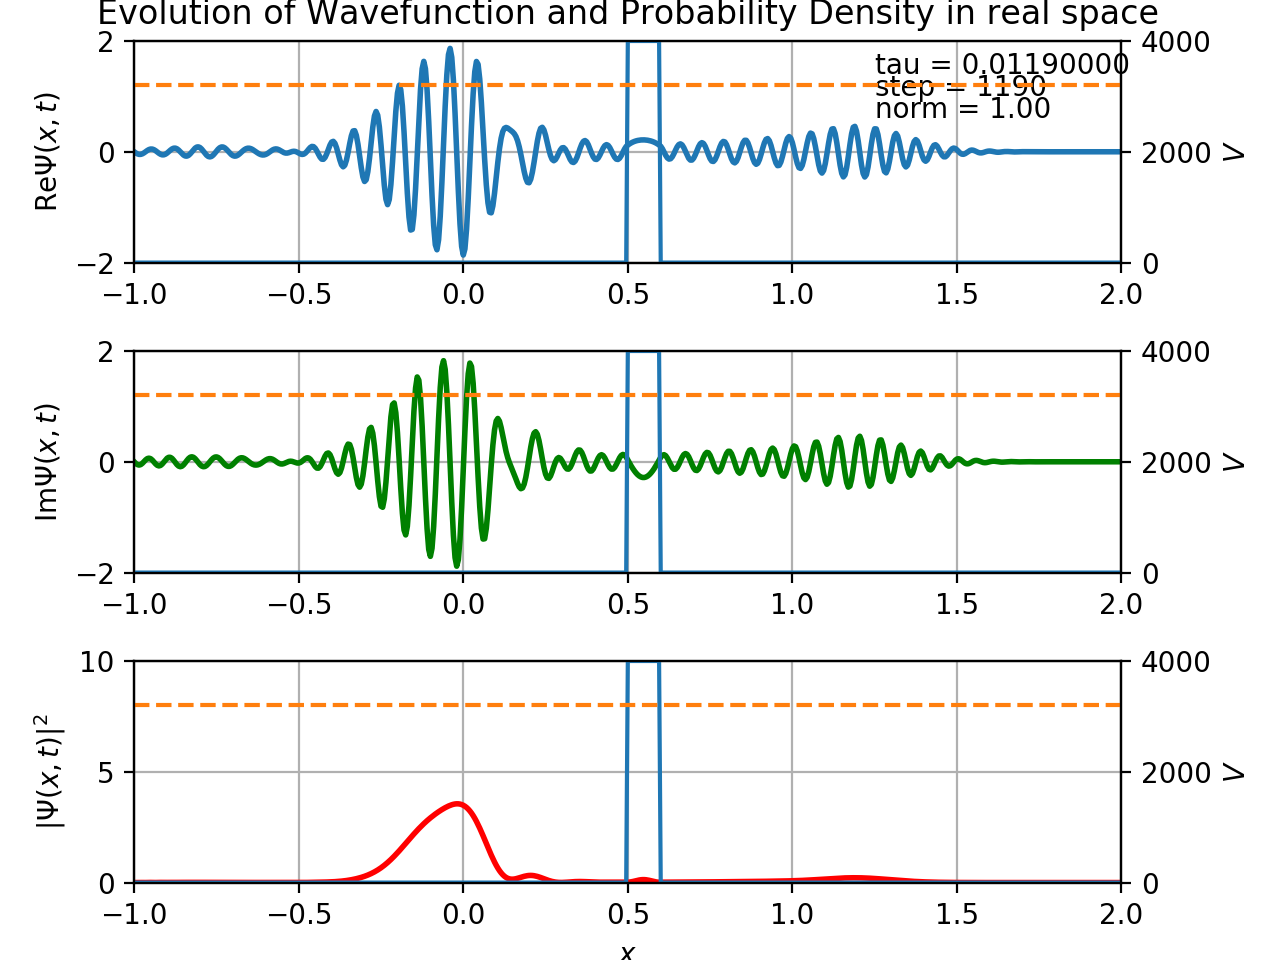

In [13]:
worker.reset()
x = worker.x
V = worker.V
Energy = worker.energy()

# create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='g')
line3, = ax3.plot([], [], lw=2, color='r')
ax1_twin = ax1.twinx()
ax2_twin = ax2.twinx()
ax3_twin = ax3.twinx()
ax1_twin.plot(x,V)
ax1_twin.plot([x[0],x[-1]], [Energy, Energy], '--')
ax2_twin.plot(x, V)
ax2_twin.plot([x[0],x[-1]], [Energy, Energy], '--')
ax3_twin.plot(x, V)
ax3_twin.plot([x[0],x[-1]], [Energy, Energy], '--')
ax1_twin.set_ylabel(r'$V$')
ax2_twin.set_ylabel(r'$V$')
ax3_twin.set_ylabel(r'$V$')
ax1_twin.set_ylim([np.min(V),np.max(V)])
ax2_twin.set_ylim([np.min(V),np.max(V)])
ax3_twin.set_ylim([np.min(V),np.max(V)])
plt.tight_layout()
line = [line1, line2, line3]

# the same axes initalizations as before (just now we do it for both of them)
ax1.set_ylim(-2,2)
ax1.set_xlim(x_min, x_max)
ax1.grid()
ax1.set_ylabel(r'Re$\Psi(x,t)$')
ax1.set_title("Evolution of Wavefunction and Probability Density in real space")

ax2.set_ylim(-2, 2)
ax2.set_xlim(x_min, x_max)
ax2.grid()
ax2.set_ylabel(r'Im$\Psi(x,t)$')

ax3.set_ylim(0, 10)
ax3.set_xlim(x_min, x_max)
ax3.grid()
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$|\Psi(x,t)|^2$')

time_text = ax1.text(0.75, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
step_text = ax1.text(0.75, 0.85,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
norm_text = ax1.text(0.75, 0.75,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
time_per_frame = dt     # You could change this to make the animation faster or slower

def run_init():
    line[0].set_data([], [])
    line[1].set_data([], [])
    line[2].set_data([], [])
    return line,
    
def run(i):
    worker.step()
    y1data = worker.psi_re_new
    y2data = worker.psi_im_new
    (y3data, norm) = worker.density()

    # update the data of the three line objects
    line[0].set_data(x, y1data)
    line[1].set_data(x, y2data)
    line[2].set_data(x, y3data)
    #Display the current animation time
    time_text.set_text('tau = %.8f' % worker.time)
    step_text.set_text('step = ' + str(worker.m))
    norm_text.set_text('norm = %.2f' % (norm))
    return line, time_text, step_text, norm_text

ani = animation.FuncAnimation(fig, run, init_func=run_init,
                               frames=1000, interval=1, blit=True)
    
plt.show()